# Airline passanger forecasting.

In [3]:
## importing laibaries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## loading the data set.
df=pd.read_csv("AirlinesData.csv")

In [5]:
## checking the shape of the data
df.shape

(96, 2)

In [6]:
## checking the data
df.head(10)

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
5,Jun-95,135
6,Jul-95,148
7,Aug-95,148
8,Sep-95,136
9,Oct-95,119


## EDA

In [7]:
df["Month"] = pd.to_datetime(df.Month,format="%b-%y")

In [8]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [9]:
df.shape

(96, 2)

In [10]:
## Extracting month & year
df["month"] = df.Month.dt.strftime("%b")
df["year"] = df.Month.dt.strftime("%Y")

In [11]:
df.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


<AxesSubplot:xlabel='month', ylabel='year'>

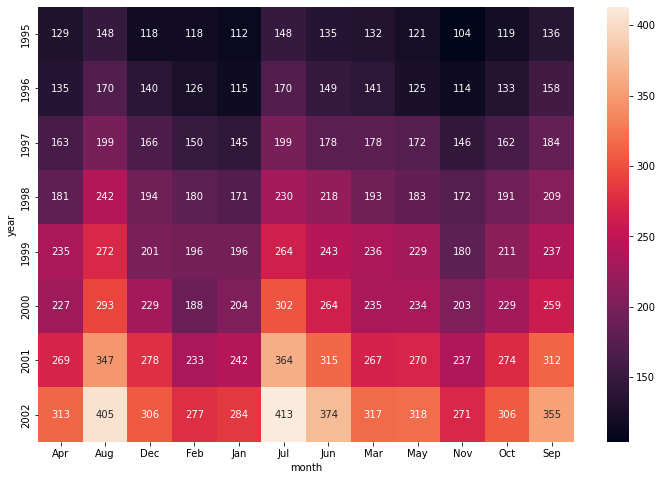

In [12]:
## Heat map
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") 

<AxesSubplot:xlabel='year', ylabel='Passengers'>

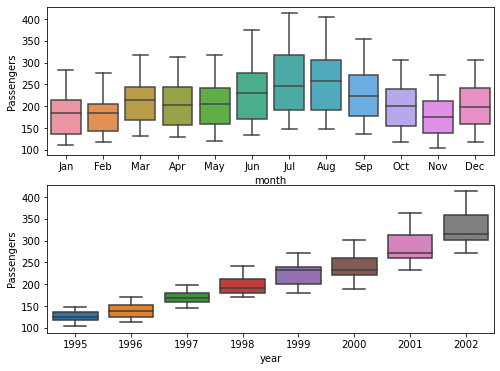

In [13]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=df)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

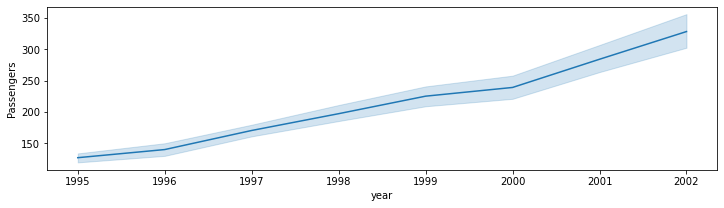

In [14]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=df)

## From above ther is linear increasing Trend !

In [15]:
### converting Month into int with help og OHE
df1=pd.get_dummies(df,columns=['month'])

In [16]:
df1.head()

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [17]:
log_pasg=np.log(df1['Passengers'])

In [18]:
log_pasg

0     4.718499
1     4.770685
2     4.882802
3     4.859812
4     4.795791
        ...   
91    6.003887
92    5.872118
93    5.723585
94    5.602119
95    5.723585
Name: Passengers, Length: 96, dtype: float64

In [19]:
df3 = pd.concat([log_pasg, df1], join = 'outer', axis = 1)

In [20]:
df3.head()

,Passengers,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,4.718499,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,4.770685,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,4.882802,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,4.859812,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,4.795791,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [21]:
df3 = df3.rename(columns = {"Passengers":"log_pass"})

In [22]:
df3.head()

,log_pass,Month,log_pass,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,4.718499,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,4.770685,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,4.882802,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,4.859812,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,4.795791,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [23]:
column_names = df3.columns.values
column_names[2] = 'Passengers'
df3.columns = column_names

In [24]:
df3.head()

,log_pass,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,4.718499,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,4.770685,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,4.882802,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,4.859812,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,4.795791,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0


C:\Users\Aniket Mali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


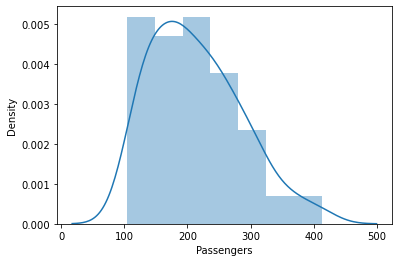

In [25]:
## histogram
sns.distplot(df['Passengers'])
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Passengers'>

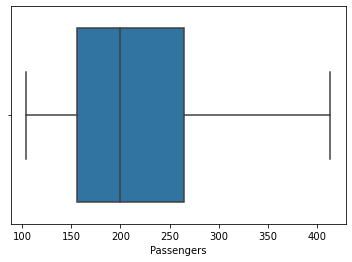

In [26]:
## Boxplot
sns.boxplot(df['Passengers'])

<AxesSubplot:>

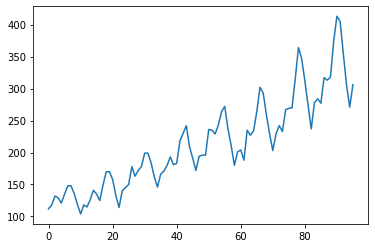

In [27]:
## Line plot
df1.Passengers.plot()

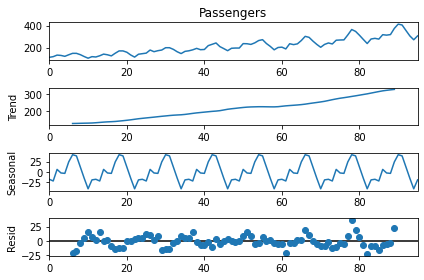

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

In [29]:
## Spliting the data into train & test
Train = df1.head(82)
Test = df1.tail(14)

In [30]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~year',data=df).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['year'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

44.27450895105605

In [31]:
##Multiplicative Seasonality

Mul_sea = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data = df3).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

7.813211860031614e+112

In [32]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_pass~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+year',data = df3).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

8.331212939960963

In [33]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+year',data=df3).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','year']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

18.496919654535716

In [34]:
#Result table

data = {"MODEL":pd.Series(["rmse_linear","rmse_Mult_sea","rmse_Mult_add_sea ","rmse_add_sea_quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Mult_sea,rmse_Mult_add_sea,rmse_add_sea_quad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_Mult_add_sea,8.331213e+00
3,rmse_add_sea_quad,1.849692e+01
0,rmse_linear,4.427451e+01
1,rmse_Mult_sea,7.813212e+112


## As rmse_Mult_add_sea has low value of rsme so we build model with respect to its parameter.

In [35]:
## building the final model.
model= smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+year',data=df3).fit()

In [36]:
y_pred=model.predict(Test)
print(y_pred)

82    248.666667
83    274.291667
84    298.166667
85    298.041667
86    326.916667
87    321.041667
88    321.041667
89    349.041667
90    375.791667
91    374.041667
92    345.791667
93    317.666667
94    292.916667
95    318.541667
dtype: float64


## Advanced forcasting models.

## ACF plots and PACF plots

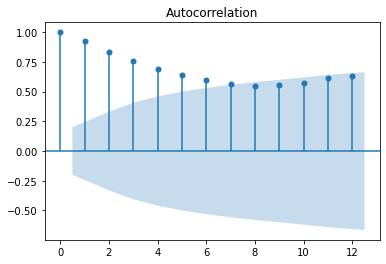

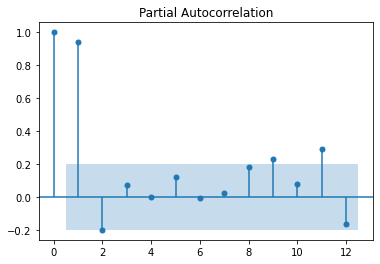

In [37]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df3.Passengers,lags=12)
tsa_plots.plot_pacf(df3.Passengers,lags=12)
plt.show()

In [38]:
##Evaluation matrics
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [39]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [40]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

12.187436123357298

## Holts method

In [41]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

18.56785389077194

## Holts winter exponential smoothing with additive seasonality and additive trend

In [42]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

5.925239829743208

## Holts winter exponential smoothing with multiplicative seasonality and additive trend.

In [43]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

3.442316982025928

## From above observation Holts winter exponential smoothing with multiplicative seasonality and additive trend gives us lowest MAPE so we used this model for final model building !

### Final model.

In [44]:
hwe_model_mul_add = ExponentialSmoothing(df1["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [45]:
## Predicting next 10 forecast
hwe_model_mul_add.forecast(10)

96     312.899483
97     308.172137
98     355.532626
99     345.771258
100    345.697121
101    392.471492
102    436.502350
103    429.860359
104    380.174318
105    332.318757
dtype: float64

# ARIMA MODEL

In [46]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
import warnings

In [58]:
df3.head()

,log_pass,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,4.718499,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,4.770685,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,4.882802,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,4.859812,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,4.795791,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [73]:
df4=df3.drop(['Month','log_pass','month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul',"month_Jun",
             'month_Mar','month_May','month_Nov','month_Oct','month_Sep','year'],axis=1)

In [74]:
# separate out a validation dataset
split_point = len(df4) - 10
dataset, validation = df4[0:split_point], df4[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


In [75]:
df4.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [76]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values

In [77]:
X

array([[118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
       [229],
      

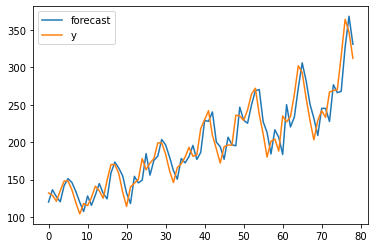

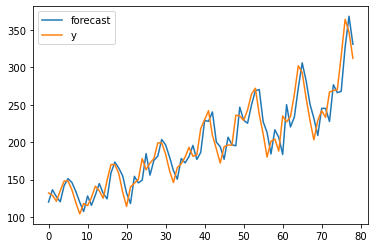

In [85]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [88]:
#Error on the test data
from math import sqrt
from sklearn.metrics import mean_squared_error
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

71.93697650540321

In [95]:
forecast

array([271.54444395, 272.96718349, 277.13674722, 280.43797127,
       282.2267577 , 283.52405734, 285.09893437, 287.0043271 ,
       288.98788907, 290.89407403])